# Match Stats

## Check match stats per league

In [6]:
from pathlib import Path
import pandas as pd

data_dir = Path("../data/raw/fbref")

In [9]:
match_stats = list(data_dir.glob("**/**/match_stats/*.csv"))
d = []
for m in match_stats:
    s = str(m)
    components = s.split("/")
    tier = components[-4]
    year = components[-3]
    country = components[-5]
    stat = components[-1].replace(".csv", "")
    d.append({"country": country, "year": year, "tier": tier, "stat": stat})

In [10]:
df = pd.DataFrame(d)
df

,country,year,tier,stat
0,ESP,2019,2nd,results
1,ESP,2021,2nd,results
2,ESP,2020,2nd,results
3,ESP,2025,2nd,results
4,ESP,2022,2nd,results
...,...,...,...,...
573,ENG,2013,1st,results
574,ENG,1973,1st,results
575,ENG,1982,1st,results
576,ENG,1965,1st,results


In [13]:
summaries = df[(df["stat"] == "summary") & (df["tier"] == "1st")]
summaries.sort_values(by=["country", "year", "tier"])

,country,year,tier,stat
559,ENG,2018,1st,summary
425,ENG,2019,1st,summary
454,ENG,2020,1st,summary
440,ENG,2021,1st,summary
472,ENG,2022,1st,summary
518,ENG,2023,1st,summary
509,ENG,2024,1st,summary
467,ENG,2025,1st,summary
74,ESP,2018,1st,summary
14,ESP,2019,1st,summary


In [23]:
import seaborn as sns

AttributeError: Rectangle.set() got an unexpected keyword argument 'stacked'

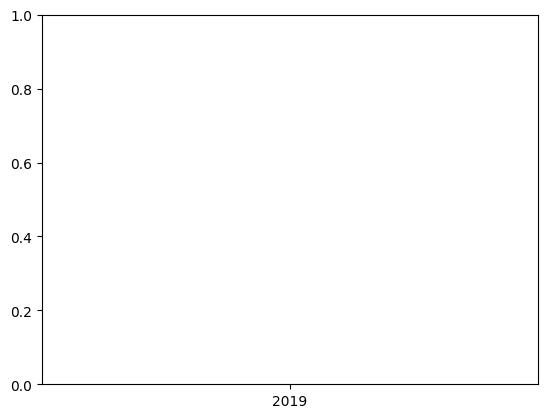

In [26]:
sns.countplot(data=summaries, x="year", hue="country", stacked=True)

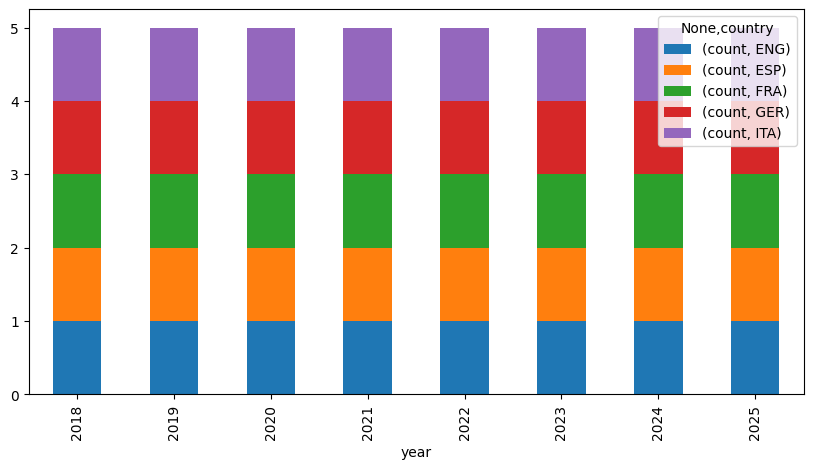

In [28]:
def plot_stat_type(df, stat, tier):
    df = df[(df["stat"] == stat) & (df["tier"] == tier)]
    df = df.sort_values(by=["country", "year", "tier"])
    agg = df.groupby(["country", "year"]).size().rename("count").reset_index()
    agg.pivot(columns=["country"], index=["year"]).plot(
        kind="bar", figsize=(10, 5), stacked=True
    )


plot_stat_type(df, "summary", "1st")

In [42]:
df1 = pd.read_csv("../data/raw/fbref/ENG/1st/2018/match_stats/lineup.csv")
df2 = pd.read_csv("../data/raw/fbref/ENG/1st/2019/match_stats/lineup.csv")

In [41]:
df1.drop_duplicates().to_csv(
    "../data/raw/fbref/ENG/1st/2018/match_stats/lineup.csv", index=False
)

In [43]:
df1.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Matchday     13675 non-null  float64
 1   Team         13675 non-null  object 
 2   Home_Away    13675 non-null  object 
 3   Formation    13675 non-null  object 
 4   Player_Num   13675 non-null  int64  
 5   Player_Name  13675 non-null  object 
 6   Starting     13675 non-null  object 
 7   PlayerURL    13675 non-null  object 
 8   Nation       13675 non-null  object 
 9   Pos          13675 non-null  object 
 10  Age          13675 non-null  object 
 11  Min          10448 non-null  float64
 12  Gls          10448 non-null  float64
 13  Ast          10448 non-null  float64
 14  CrdY         10448 non-null  float64
 15  CrdR         10448 non-null  float64
 16  MatchURL     13675 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 9.8 MB


In [45]:
df2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13679 entries, 0 to 13678
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Matchday     13679 non-null  float64
 1   Team         13679 non-null  object 
 2   Home_Away    13679 non-null  object 
 3   Formation    13679 non-null  object 
 4   Player_Num   13679 non-null  int64  
 5   Player_Name  13679 non-null  object 
 6   Starting     13679 non-null  object 
 7   PlayerURL    13679 non-null  object 
 8   Nation       13679 non-null  object 
 9   Pos          13679 non-null  object 
 10  Age          13679 non-null  object 
 11  Min          10480 non-null  float64
 12  Gls          10480 non-null  float64
 13  Ast          10480 non-null  float64
 14  CrdY         10480 non-null  float64
 15  CrdR         10480 non-null  float64
 16  MatchURL     13679 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 9.8 MB


In [48]:
for f in data_dir.glob("**/**/match_stats/**/*.csv"):
    season = f.parent.parent.parent.name

2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
1st
1st
1st
1st
1st
1st
1st
1st
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
1st
1st
1st
1st
1st
1st
1st
1st
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
1st
1st
1st
1st
1st
1st
1st
1st
1st
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
1st
1st
1st
1st
1st
1st
1st
2025
2025
2025
2025
2025
2025
2025
2025
2025
2025
2025
2025
2025
2025
1st
1st
1st
1st
1st
1st
2022
2022
2022
2022
2022
2022
2022
2022
2022
2022
2022
2022
2022
2022
1st
1st
1st
1st
1st
2017
2017
1st
1st
1st
1st
1st
1st
1st
1st
1st
1st
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
1st
1st
1st
1st
1st
1st
1st
1st
1st
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
1st
1st
1st
1st
1st
1st
1st
1st
1st
1st
1st
1st
1st
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
1st
1st
1st
1st
1st
2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
2nd
1st
1st
1st
1st
1st
1s